In [1]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rc_={
    "figure.dpi":100,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [2]:
mon_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']#['May']#
#folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information\ununiform-hour'
folder_path=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information\uniform-hour'
fn_list=[]
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))

In [3]:
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)

In [4]:
y_dic

{'U': [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([ 8.88458496, 11.33408891, 14.46538808,  8.4041686 ,  9.94252199,
         12.37886583, 12.50810988, 14.8747249 , 11.40260886,  5.5518776 ,
          8.28004758,  8.72141797]),
  array([ 9.54161002, 12.13970914, 15.85357904,  8.80012592, 10.659653  ,
         13.15469432, 12.20014499, 15.60161289, 11.60982777,  6.01928521,
         16.50767729,  9.34486033]),
  array([10.31094882, 13.12509839, 17.47278444,  9.33062085, 11.5950812 ,
         12.33410648, 12.19141874, 17.61901066, 11.82936587,  6.53205803,
         17.51048146, 10.1907007 ]),
  array([11.98041065, 15.11164279, 19.59816564, 10.45612731, 13.44885339,
         14.32084871, 13.36808361, 18.64219246, 12.1892782 ,  8.67182107,
         19.38624163, 11.73002963]),
  array([13.69621998, 17.04706756, 21.84977248, 12.03907343, 15.20265291,
         17.23249844, 15.08124321, 20.51714615, 12.60032362, 10.7959345 ,
         21.36529816, 13.2287488 ]),
  array([15

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

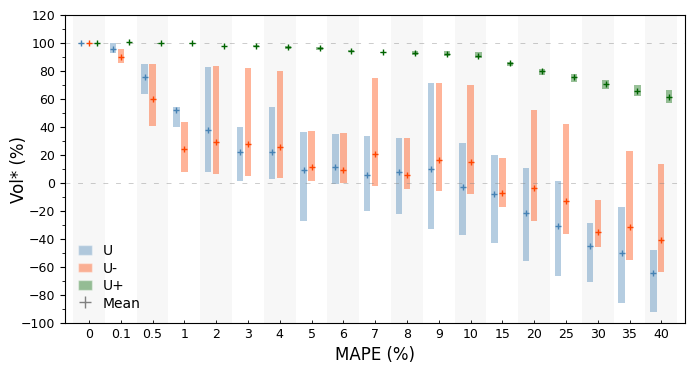

In [5]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,
    mape=mape,y_dic=y_dic_old,mean_dic=mean_dic_old,
    save_fn="fig3-value-of-info-track-real-may.png"

)

In [6]:
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

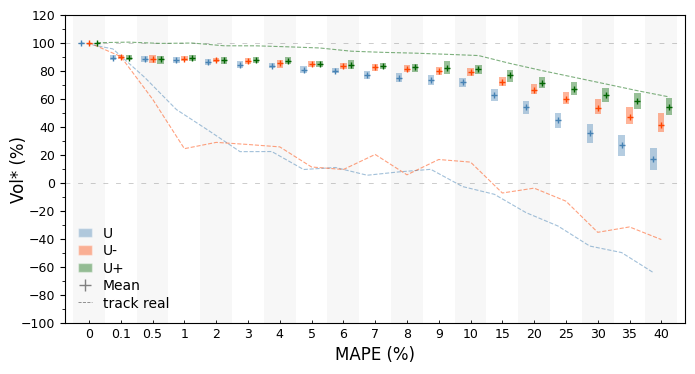

In [7]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,
    mape=mape,y_dic=y_dic,mean_dic=mean_dic,
    mean_dic_old=mean_dic_old,plot_line_old=True
)
